IMPLEMENT HIDDEN MARKOW MODEL FOR ITALIAN AND ENGLISH NER

In [1]:
import numpy as np
from conllu import parse
from NER.src.hmm.model import HiddenMarkovModel
from NER.src.hmm.evaluation import *
%load_ext autoreload
%reload_ext autoreload

In [2]:
tags = ['B-PER','B-ORG','B-LOC','B-MISC','I-PER','I-ORG','I-LOC','I-MISC','O']

Train and Decoding Italian

In [3]:
# Italian Datasets
it_trainDataPath = getDataPath("it","train")
it_validateDataPath = getDataPath("it","val")
it_testDataPath = getDataPath("it","test")

In [4]:
# Training of the model

it_hmm= HiddenMarkovModel(tags)

it_hmm.fit(it_trainDataPath)
it_hmm.calculateStatisticPosTagging(it_validateDataPath)

In [5]:
%autoreload 2
from NER.src.hmm.evaluation import *
# Testing and evaluating  different smoothers
print("IT- Smoothing 0: sets HiddenMarkovModel.ZERO_PROB")
conf_matr, accuracy, avg_precision, avg_recall,    avg_f1_score = evaluate(it_hmm,"it",tags,0)
print("IT- Smoothing 1: sets  P(unk|O) = 1")
conf_matr1,accuracy1, avg_precision1, avg_recall1, avg_f1_score1= evaluate(it_hmm,"it",tags,1)
print("IT- Smoothing 2: sets P(unk|O)=P(unk|B-MISC)=0.5")
conf_matr2,accuracy2, avg_precision2, avg_recall2, avg_f1_score2= evaluate(it_hmm,"it",tags,2)
print("IT- Smoothing 3: sets P(unk|ti) = 1/#(NER_TAGs)")
conf_matr3,accuracy3, avg_precision3, avg_recall3, avg_f1_score3= evaluate(it_hmm,"it",tags,3)
print("IT- Smoothing 4: sets same as words that compare just one time in the eval dataset")
conf_matr4,accuracy4, avg_precision4, avg_recall4, avg_f1_score4= evaluate(it_hmm,"it",tags,4)

IT- Smoothing 0: sets HiddenMarkovModel.ZERO_PROB


AttributeError: 'HiddenMarkovModel' object has no attribute 'predict2'

In [ ]:

%autoreload 2
# Baseline evaluate
from NER.src.hmm.random_tagger import RandomTagger
from NER.src.hmm.majority import MajorityTagger

it_random=RandomTagger(tags)
it_majority=MajorityTagger(tags)

it_random.fit(it_trainDataPath)
it_majority.fit(it_trainDataPath)

In [ ]:
%autoreload 2
from NER.src.hmm.evaluation import *
# Testing and evaluating  different smoothers
print("IT- RandomTagger")
b_conf_matr, b_accuracy, b_avg_precision, b_avg_recall,    b_avg_f1_score = evaluateBaseLines(it_random,"it",tags)
print("IT- MajorityTagger")
b_conf_matr1,b_accuracy1, b_avg_precision1, b_avg_recall1, b_avg_f1_score1= evaluateBaseLines(it_majority,"it",tags)

IT- RandomTagger
Accuracy: 0.111
Precision: 0.779
Recall: 0.111
F1-score: 0.177
IT- MajorityTagger
Accuracy: 0.957
Precision: 0.952
Recall: 0.957
F1-score: 0.953


[Text(0.5, 1.0, 'Smoothing 4: sets the less frequent tag in EVAL dataset')]

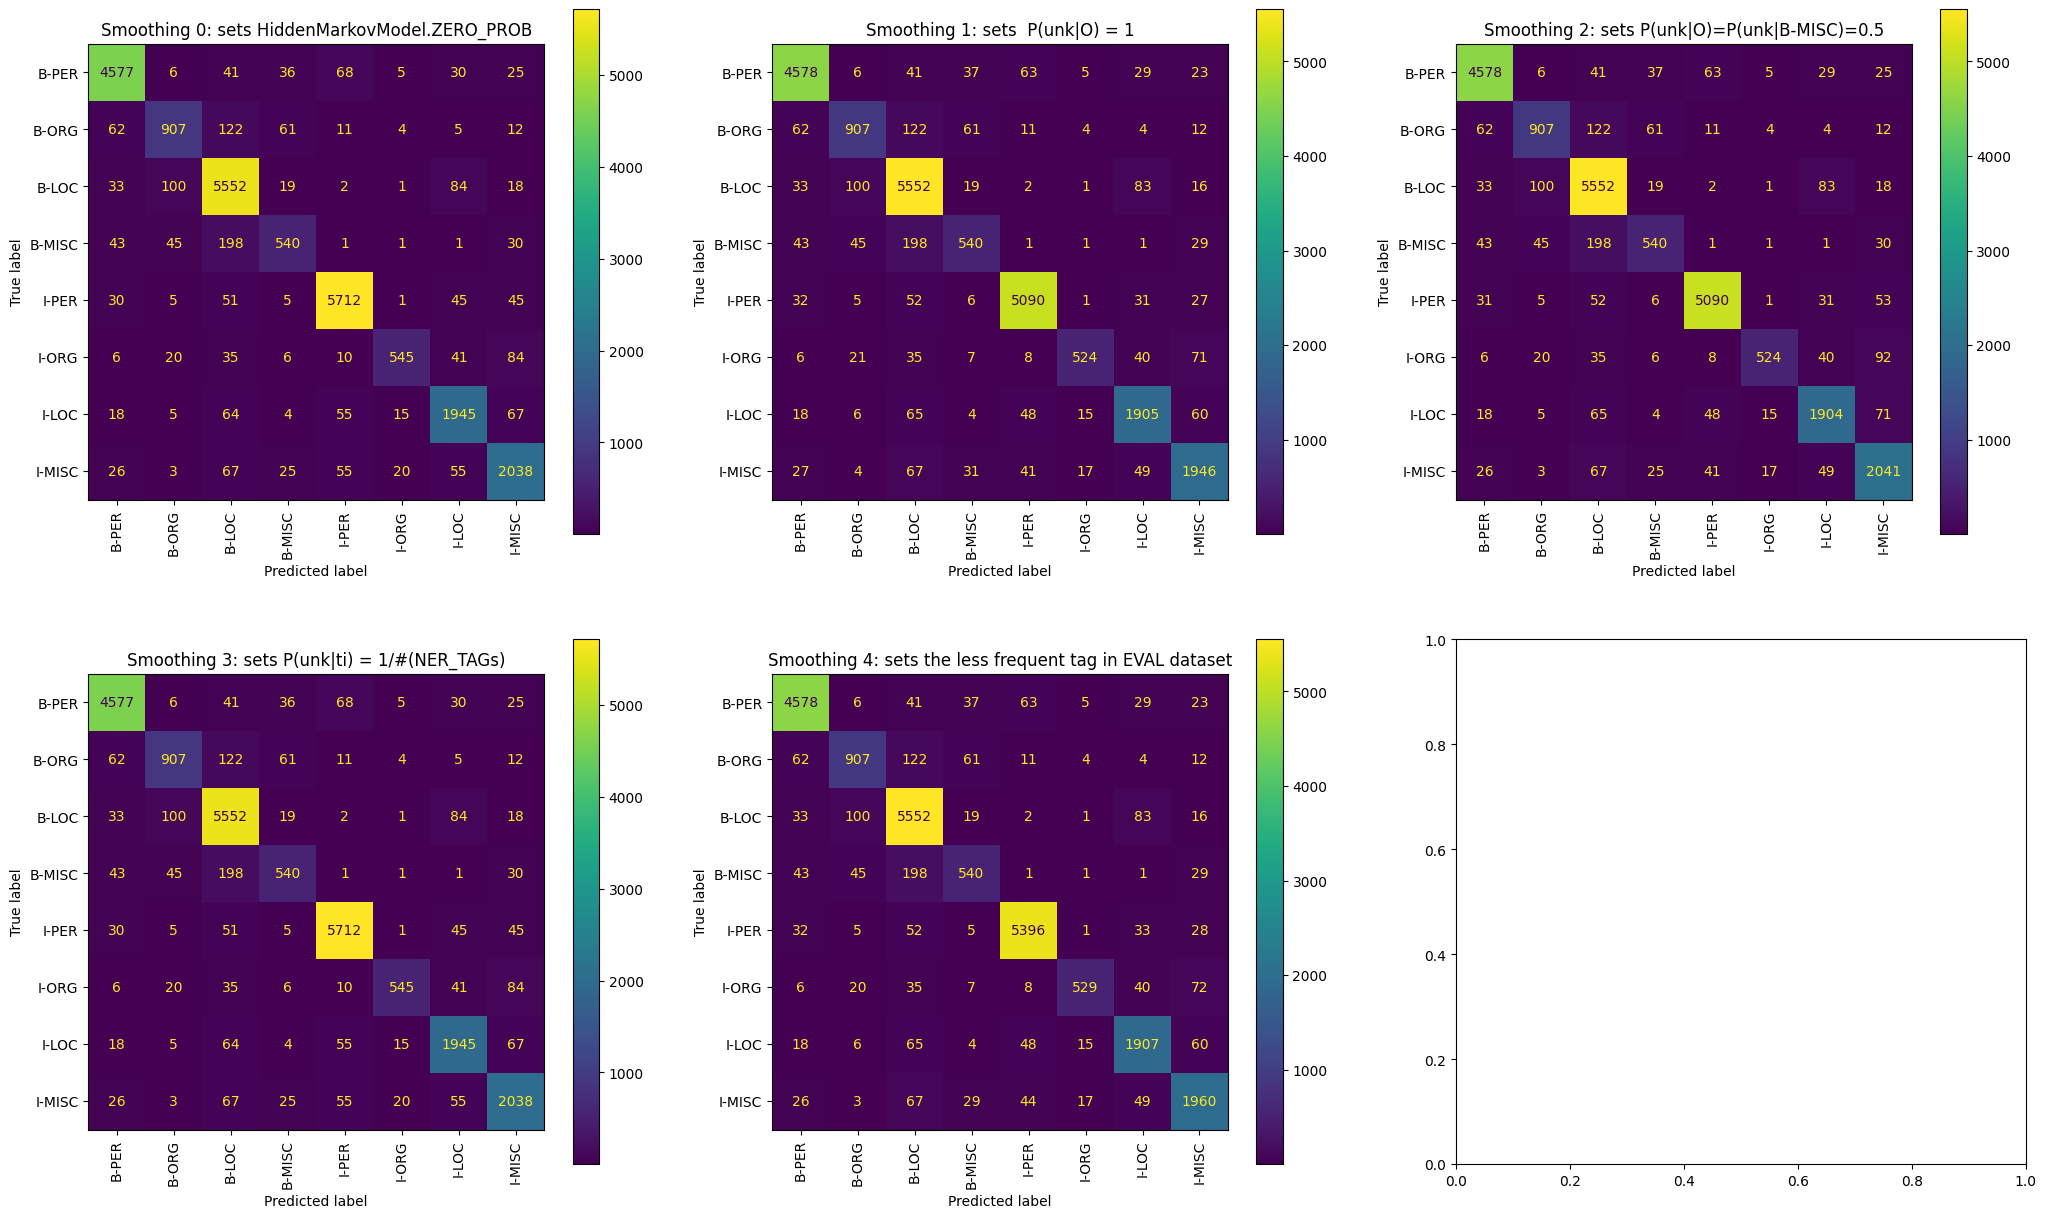

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


conf_mat_  = ConfusionMatrixDisplay(confusion_matrix= conf_matr[:,:], display_labels=tags[:])
conf_mat_1 = ConfusionMatrixDisplay(confusion_matrix=conf_matr1[:,:], display_labels=tags[:])
conf_mat_2 = ConfusionMatrixDisplay(confusion_matrix=conf_matr2[:,:], display_labels=tags[:])
conf_mat_3 = ConfusionMatrixDisplay(confusion_matrix=conf_matr3[:,:], display_labels=tags[:])
conf_mat_4 = ConfusionMatrixDisplay(confusion_matrix=conf_matr4[:,:], display_labels=tags[:])
fig, axs = plt.subplots(2, 3, figsize=(25, 15))
axs = axs.flatten()

conf_mat_ .plot(ax=axs[0], xticks_rotation="vertical")
conf_mat_1.plot(ax=axs[1], xticks_rotation="vertical")
conf_mat_2.plot(ax=axs[2], xticks_rotation="vertical")
conf_mat_3.plot(ax=axs[3], xticks_rotation="vertical")
conf_mat_4.plot(ax=axs[4], xticks_rotation="vertical")

axs[0].set(title="Smoothing 0: sets HiddenMarkovModel.ZERO_PROB")
axs[1].set(title="Smoothing 1: sets  P(unk|O) = 1")
axs[2].set(title="Smoothing 2: sets P(unk|O)=P(unk|B-MISC)=0.5")
axs[3].set(title="Smoothing 3: sets P(unk|ti) = 1/#(NER_TAGs)")
axs[4].set(title="Smoothing 4: sets the less frequent tag in EVAL dataset")


Train and Decoding English

In [ ]:
# Italian Datasets
en_trainDataPath = getDataPath("en","train")
en_validateDataPath = getDataPath("en","val")
en_testDataPath = getDataPath("en","test")

In [ ]:
# Training of the model

en_hmm= HiddenMarkovModel(tags)
en_hmm.fit(en_trainDataPath)
en_hmm.calculateStatisticPosTagging(en_validateDataPath)

In [ ]:
%autoreload 2

from NER.src.hmm.evaluation import *
# Testing and evaluating  different smoothers
print("EN- Smoothing 0: sets HiddenMarkovModel.ZERO_PROB")
en_conf_matr, en_accuracy, en_avg_precision, en_avg_recall,    en_avg_f1_score = evaluate(en_hmm,"en",tags,0)
print("EN- Smoothing 1: sets  P(unk|O) = 1")
en_conf_matr1,accuracy1, en_avg_precision1, en_avg_recall1, en_avg_f1_score1= evaluate(en_hmm,"en",tags,1)
print("EN- Smoothing 2: sets P(unk|O)=P(unk|B-MISC)=0.5")
en_conf_matr2,accuracy2, en_avg_precision2, en_avg_recall2, en_avg_f1_score2= evaluate(en_hmm,"en",tags,2)
print("EN- Smoothing 3: sets P(unk|ti) = 1/#(NER_TAGs)")
en_conf_matr3,en_accuracy3, aen_vg_precision3, en_avg_recall3, en_avg_f1_score3= evaluate(en_hmm,"en",tags,3)
print("EN- Smoothing 4: sets same as words that compare just one time in the eval dataset")
en_conf_matr4,en_accuracy4, en_avg_precision4, en_avg_recall4, en_avg_f1_score4= evaluate(en_hmm,"en",tags,4)

EN- Smoothing 0: sets HiddenMarkovModel.ZERO_PROB
Accuracy: 0.933
Precision: 0.926
Recall: 0.933
F1-score: 0.924
EN- Smoothing 1: sets  P(unk|O) = 1
Accuracy: 0.931
Precision: 0.923
Recall: 0.931
F1-score: 0.921
EN- Smoothing 2: sets P(unk|O)=P(unk|B-MISC)=0.5
Accuracy: 0.931
Precision: 0.923
Recall: 0.931
F1-score: 0.922
EN- Smoothing 3: sets P(unk|ti) = 1/#(NER_TAGs)
Accuracy: 0.933
Precision: 0.926
Recall: 0.933
F1-score: 0.924
EN- Smoothing 4: sets same as words that compare just one time in the eval dataset
Accuracy: 0.931
Precision: 0.923
Recall: 0.931
F1-score: 0.922


In [ ]:
%autoreload 2
# Baseline evaluate
from NER.src.hmm.random_tagger import RandomTagger
from NER.src.hmm.majority import MajorityTagger

en_random=RandomTagger(tags)
en_majority=MajorityTagger(tags)

en_random.fit(en_trainDataPath)
en_majority.fit(en_trainDataPath)

In [ ]:
%autoreload 2
from NER.src.hmm.evaluation import *
# Testing and evaluating  different smoothers
print("EN- RandomTagger")
b_conf_matr, b_accuracy, b_avg_precision, b_avg_recall,    b_avg_f1_score = evaluateBaseLines(en_random,"en",tags)
print("EN- MajorityTagger")
b_conf_matr1,b_accuracy1, b_avg_precision1, b_avg_recall1, b_avg_f1_score1= evaluateBaseLines(en_majority,"en",tags)

EN- RandomTagger
Accuracy: 0.110
Precision: 0.772
Recall: 0.110
F1-score: 0.176
EN- MajorityTagger
Accuracy: 0.944
Precision: 0.937
Recall: 0.944
F1-score: 0.938


[Text(0.5, 1.0, 'Smoothing 4: sets the less frequent tag in EVAL dataset')]

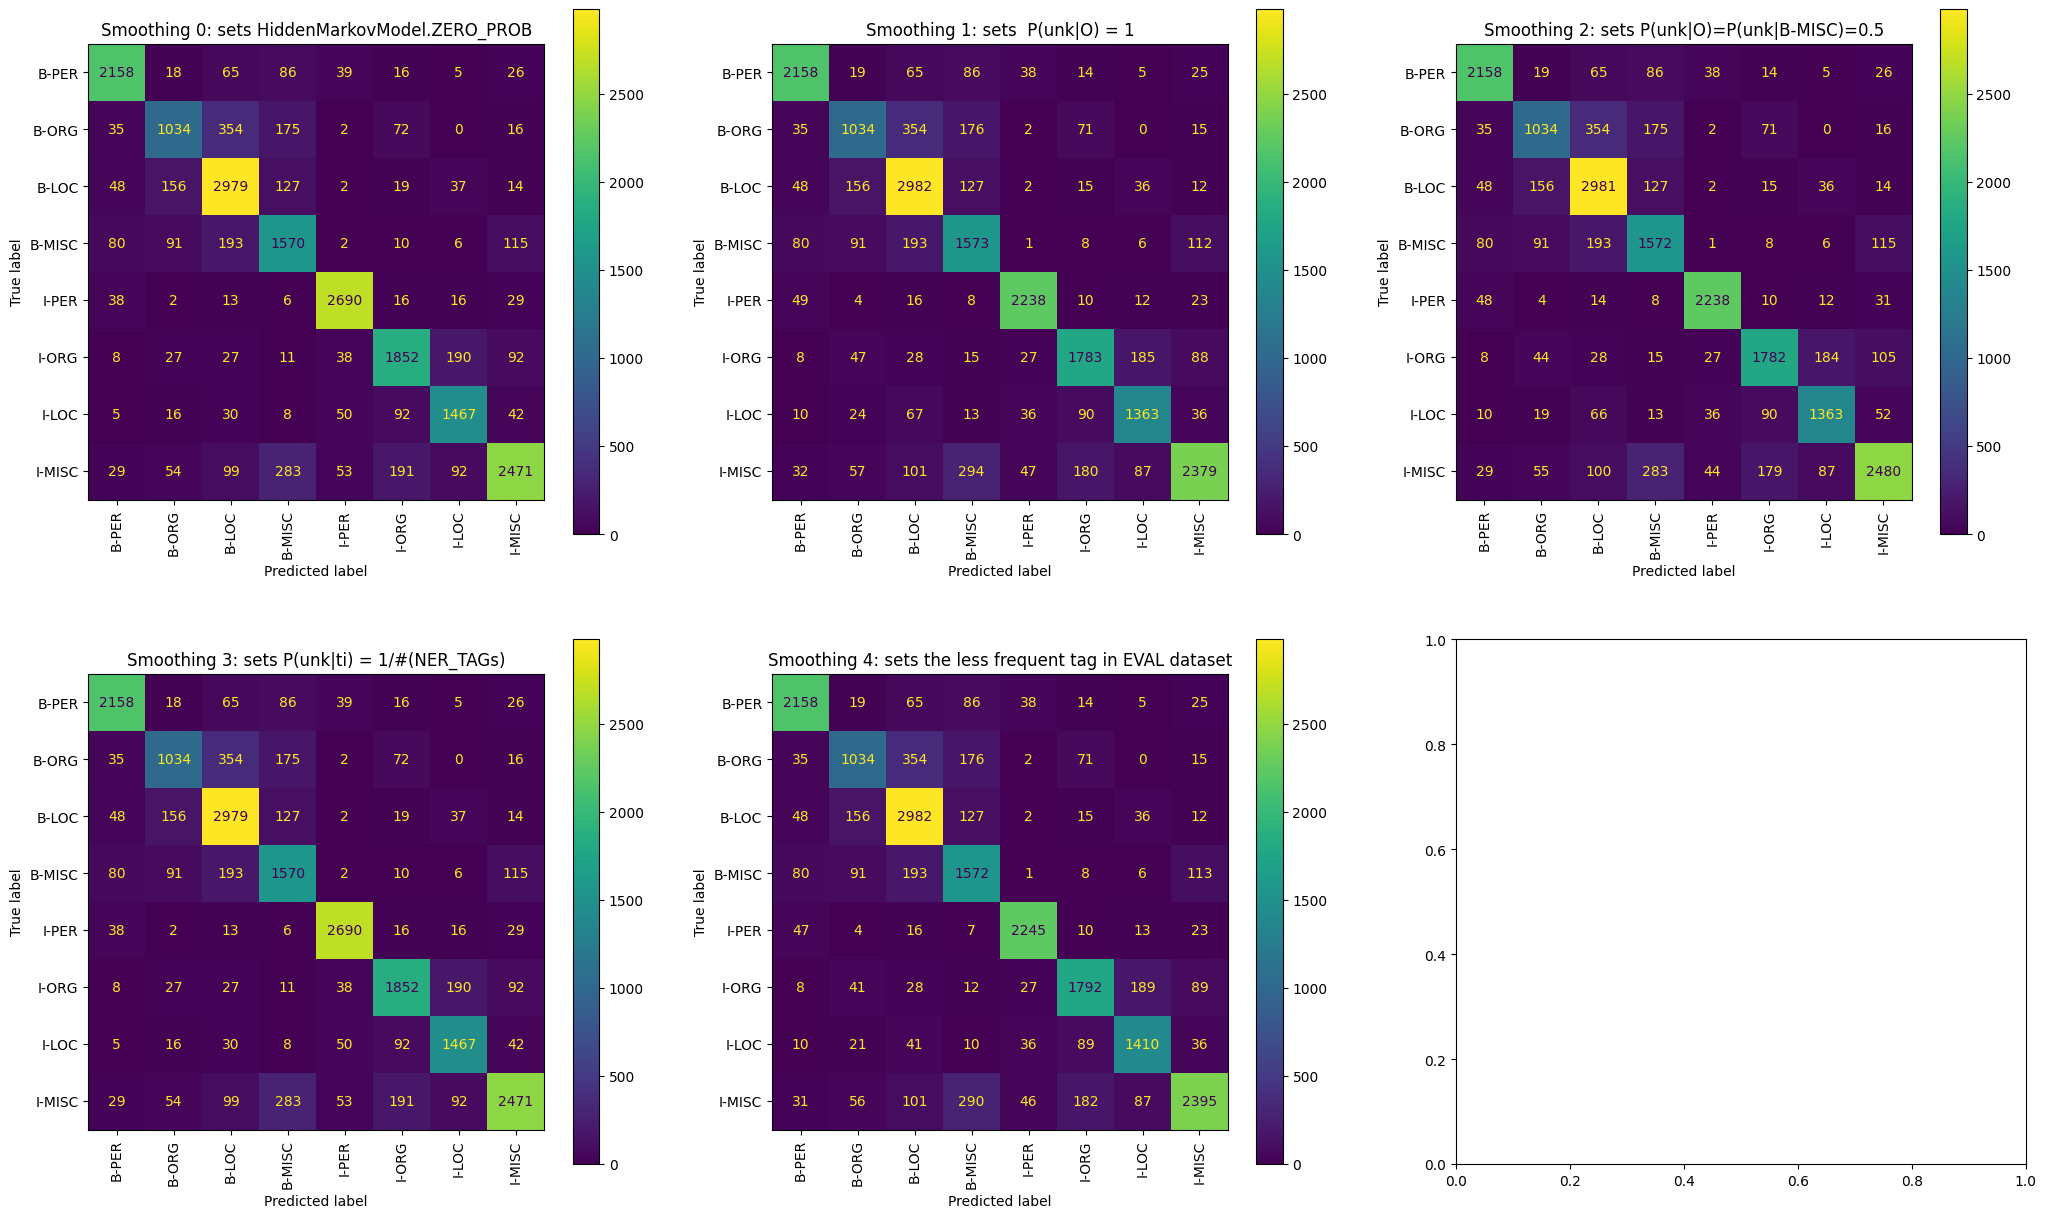

In [ ]:


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


en_conf_mat_  = ConfusionMatrixDisplay(confusion_matrix=en_conf_matr[:,:], display_labels=tags[:])
en_conf_mat_1 = ConfusionMatrixDisplay(confusion_matrix=en_conf_matr1[:,:], display_labels=tags[:])
en_conf_mat_3 = ConfusionMatrixDisplay(confusion_matrix=en_conf_matr3[:,:], display_labels=tags[:])
en_conf_mat_2 = ConfusionMatrixDisplay(confusion_matrix=en_conf_matr2[:,:], display_labels=tags[:])
en_conf_mat_4 = ConfusionMatrixDisplay(confusion_matrix=en_conf_matr4[:,:], display_labels=tags[:])
fig, axs = plt.subplots(2, 3, figsize=(25, 15))
axs = axs.flatten()

en_conf_mat_ .plot(ax=axs[0], xticks_rotation="vertical")
en_conf_mat_1.plot(ax=axs[1], xticks_rotation="vertical")
en_conf_mat_2.plot(ax=axs[2], xticks_rotation="vertical")
en_conf_mat_3.plot(ax=axs[3], xticks_rotation="vertical")
en_conf_mat_4.plot(ax=axs[4], xticks_rotation="vertical")

axs[0].set(title="Smoothing 0: sets HiddenMarkovModel.ZERO_PROB")
axs[1].set(title="Smoothing 1: sets  P(unk|O) = 1")
axs[2].set(title="Smoothing 2: sets P(unk|O)=P(unk|B-MISC)=0.5")
axs[3].set(title="Smoothing 3: sets P(unk|ti) = 1/#(NER_TAGs)")
axs[4].set(title="Smoothing 4: sets the less frequent tag in EVAL dataset")


Test on Harry Potter Phrases

In [ ]:
sentences = ["La vera casa di Harry Potter è il castello di Hogwarts.",
             "Harry le raccontò del loro incontro a Diagon Alley.",
             "Mr Dursley era direttore di una ditta di nome Grunnings, che fabbricava trapani."]

sentences_words = [  ["La", "vera", "casa", "di", "Harry", "Potter", "è", "il", "castello", "di", "Hogwarts", "."],
  ["Harry", "le", "raccontò", "del", "loro", "incontro", "a", "Diagon", "Alley", "."],
  ["Mr", "Dursley", "era", "direttore", "di", "una", "ditta", "di", "nome", "Grunnings", ",", "che", "fabbricava", "trapani", "."]
]

sentences_tags = [  ["O", "O", "O", "O", "B-PER", "I-PER", "O", "O", "O", "O", "B-LOC", "O"],
  ["B-PER", "O", "O", "O", "O", "O", "O", "B-MISC", "I-MISC", "O"],
  ["B-ORG", "I-ORG", "O", "O", "O", "O", "O", "O", "O", "I-ORG", "O", "O", "O", "O", "O"]
]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

y_true = []
y_pred = []
errors = dict();
for sentence_words,real_tags in zip(sentences_words,sentences_tags):
    words = sentence_words
    backtrace_test, probabilities_test = it_hmm.predict(words, 3)
    y_true.extend( [tag] for tag in real_tags)
    y_pred.extend( [tags[eval]] for eval in backtrace_test)

# Calculate accuracy
print(f"POS tagger accuracy: {accuracy:.2%}")
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted',zero_division=0)
'''
zero_division=1
By default, zero_division is set to 0, which means that if there are no true positives for a label, then the function will raise a ZeroDivisionError. This is because, mathematically, precision and recall are undefined when there are no true positives.

Setting zero_division to 1 means that the precision and recall will be set to 1 when there are no true positives for a label. This can be useful in cases where you want to prioritize avoiding false negatives over avoiding false positives, and you don't want the absence of true positives to penalize your evaluation too heavily. However, this also means that your precision and recall scores may be inflated and not reflect the true performance of your model.
'''
accuracy = accuracy_score(y_true, y_pred)
# print the results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1-score: {:.3f}".format(f1_score))

POS tagger accuracy: 81.08%
Accuracy: 0.811
Precision: 0.677
Recall: 0.811
F1-score: 0.738
